In [24]:
# Work 2:
# Author: Erick Tornero
# Sentiment prediction

# Definición de función de procesado de texto:

Esta funciona ayuda en la limpieza de cada **review**, eliminando los siguientes caracteres del texto y dejando solo las palabras en minúscula: 

* [., :, ;, ', ", (, ), [, ]]

Reemplaza los siguientes caracteres por espacios:
* <br ../> <br\ .../> , -, /

In [1]:
# Return a lower case proccesed text
def processtext(texto):
    import re
    REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\')|(\?)|(\,)|(\")|(\!)|(\()|(\))|(\[)|(\])|(\n)")
    REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
    texto = REPLACE_NO_SPACE.sub('', texto.lower())
    texto = REPLACE_WITH_SPACE.sub(' ', texto)
    return texto

# Obtención de características
Las características a utilizar se han escogido en base a un previo análisis, donde se eligieron **10** en base a su correlación con el tipo de *review*

## x2, x2: Feature \#1, Feature \#2:
* Number of positive words: 
Getted by a file *txt* where words 're clasified as a positive word, It is represented by Positive and negative dictionary

In [3]:
# Input: 
# texto_dividido: a text splitted as a List of Words
# posneg_dict: Positive and negative dictionary

# Output:
# COUNT_POSITIVE: # Of positive words according to the dictionary
# COUNT_NEGATIVE: # Of negative words according to the dictionary
def getPositiveNegativeCountWords(texto_dividido, posneg_dictionary):
        # Count the positive words
    COUNT_POSITIVE = 0
    COUNT_NEGATIVE = 0
    for word in texto_dividido:
        try:
            val = posneg_dictionary[word]
            if val == 1:
                COUNT_POSITIVE = COUNT_POSITIVE + 1
            elif val == 0:
                COUNT_NEGATIVE = COUNT_NEGATIVE + 1

        except KeyError:
            pass
    
    return (float(COUNT_POSITIVE), float(COUNT_NEGATIVE))

## x3: Feature #3>
* Is **NO** or **neither** word there?

In [4]:
# Input:
# texto: a string text.

# Output
# 1.0 if 'NO' or 'NEITHER' word is contained
# 0.0 in the other case
def isNoThere(texto):
    import re
    NO_VARS = [r'\bno\b',r'\bneither\b']
    L_NO = [re.findall(neg, texto) for neg in NO_VARS]
    le = 0
    for ll in L_NO:
        le = le+len(ll)
    if(le > 0):
        return float(1.0)
    else:
        return float(0.0)

## x4: Feature \#4:
* Number of Extremely positive words.

## x5: Feature \#5:
* If a Extremely positive word is contained in text

In [6]:
# Input:
# texto: A single text

# Output:
# Tuple (x4, x5)

# Observations
# The words was selected throw an analysis of frequency,
# this analisys is given in the other Jupyter Notebook called: AnalysisFeatures
def isExtrmPosWordsThere(texto):
    import re
    #POS_VARS = [r'\bexceptional\b',r'superlative\b',r'wonderful',r'exemplary',r'\benjoy\b',r'amazing',r'\benjoyable\b',r'\bexcellent\b']
    POS_VARS = [r'excellent',r'superb',r'fantastic',r'wonderful',r'captures',r'terrific',r'beautifully',r'delight',r'outstanding',r'brilliantly',r'friendship',r'finest',r'touching',r'magnificent',r'underrated']
    L_POS = [re.findall(pos, texto) for pos in POS_VARS]
    le = 0
    for ll in L_POS:
        le = le+len(ll)
    if(le > 0):
        return (float(le), float(1.0))
    else:
        return (float(le), float(0.0))

## x6: Feature \#6:
* Number of Extremely negative words.

## x7: Feature \#7:
* If a Extremely negative word is contained in text

In [8]:
# Input:
# texto: A single text

# Output:
# Tuple (x6, x7)

# Observations
# The words was selected throw an analysis of frequency,
# this analisys is given in the other Jupyter Notebook called: AnalysisFeatures
def isExtrmNegativeWordThere(texto):
    import re
    #POS_VARS = [r'poor', r'mediocre',r'awful',r'\bugh\b',r'avoid this one',r'dont watch',r'so bad',r'waste of time',r'suck',r'save yourself',r'minute']
    POS_VARS = [r'unimaginative',r'atrocious',r'\bdreck\b',r'drivel',r'camcorder',r'\bugh\b',r'unfunny',r'\b\*1\b',r'uwe',r'boll',r'mst3k',r'stinker',r'redeeming',r'pathetic',r'pointless',r'\bbad',r'\bdumb\b',r'annoying',r'ridiculous',r'fails',r'boring',r'avoid',r'dull',r'stupid',r'\bmess\b',r'worse',r'\bcrap\b',r'horrible',r'terrible',r'waste',r'lame',r'\bpoor',r'awful',r'worst']
    L_POS = [re.findall(pos, texto) for pos in POS_VARS]
    le = 0
    for ll in L_POS:
        le = le+len(ll)
    if(le > 0):
        return (float(le), float(1.0))
    else:
        return (float(le), float(0.0))

# Chargue full dictionary

In [9]:
# Chargue a dictionary of all posible words with positive & negative words
# Return a dictionary
def chargeDictionariPosNeg():
    posneg_dictionary = {}
    # Charge positive file of words to dictionary
    with open('goodbad/positive-words.txt','r') as fichero:
        import re
        for lin in fichero:
            if('a+' in lin):
                break
        for lin in fichero:
            if(' ' not in lin):
                posneg_dictionary[re.sub('\n','',lin)] = 1
                
    # Charge negative file of words to dictionary
    with open('goodbad/negative-words.txt','r') as fichero:
        import re
        for lin in fichero:
            if('2-faces' in lin):
                break
        for lin in fichero:
            if(' ' not in lin):
                posneg_dictionary[re.sub('\n','',lin)] = 0
    
    return posneg_dictionary

# Extrall full features

Seven Features was defined for each **review**:
* x1: Number of positive words by dictionary
* x2: Number of Negative words by dictionary
* x3: If *NO* or *NEITHER* word is in text
* x4: Number of Extremely Positive words is in the text 
* x5: If a Extremely word is defined in the text
* x6: Number of Extremely Negative words is in the text
* x7 If a Extremely Negative word ins in the text

In [11]:
# Output: Return the dictionary
def chargeDictionariPosNeg():
    posneg_dictionary = {}
    # Charge positive file of words to dictionary
    with open('goodbad/positive-words.txt','r') as fichero:
        import re
        for lin in fichero:
            if('a+' in lin):
                break
        for lin in fichero:
            if(' ' not in lin):
                posneg_dictionary[re.sub('\n','',lin)] = 1
                
    # Charge negative file of words to dictionary
    with open('goodbad/negative-words.txt','r') as fichero:
        import re
        for lin in fichero:
            if('2-faces' in lin):
                break
        for lin in fichero:
            if(' ' not in lin):
                posneg_dictionary[re.sub('\n','',lin)] = 0
    
    return posneg_dictionary

# Getting table of Features

In [13]:
# Define a dictionary to 
# charge on it, the positive & negative words
dictionary = chargeDictionariPosNeg()

In [17]:
# Define a function to extract all features and return
# a tuple of Features defined before
def extract_features(texto, dictionary):
    import re
    texto = processtext(texto)
    texto_dividido = re.split(' ', texto)
    x1, x2 = getPositiveNegativeCountWords(texto_dividido, dictionary)
    x3 = isNoThere(texto)
    #x4 = numberpronouns(texto)
    #x5 = isExclamationThere(texto)
    #x6 = getLnNumberWords(texto_dividido)
    #x7 = isSmileFaceThere(texto)
    x4, x5 = isExtrmPosWordsThere(texto)
    x6, x7 = isExtrmNegativeWordThere(texto)
    return {'x1':x1, 'x2':x2, 'x3':x3, 'x4':x4,'x5':x5,'x6':x6, 'x7':x7}

* Example of Feature extraction:

In [15]:
# A example of text:
text_example = """In 1974, the teenager Martha Moxley (Maggie Grace) moves to the high-class area of Belle Haven, Greenwich, Connecticut. On the Mischief Night, eve of Halloween, she was murdered in the backyard of her house and her murder remained unsolved. Twenty-two years later, the writer Mark Fuhrman (Christopher Meloni), who is a former LA detective that has fallen in disgrace for perjury in O.J. Simpson trial and moved to Idaho, decides to investigate the case with his partner Stephen Weeks (Andrew Mitchell) with the purpose of writing a book. The locals squirm and do not welcome them, but with the support of the retired detective Steve Carroll (Robert Forster) that was in charge of the investigation in the 70's, they discover the criminal and a net of power and money to cover the murder.<br /><br />"Murder in Greenwich" is a good TV movie, with the true story of a murder of a fifteen years old girl that was committed by a wealthy teenager whose mother was a Kennedy. The powerful and rich family used their influence to cover the murder for more than twenty years. However, a snoopy detective and convicted perjurer in disgrace was able to disclose how the hideous crime was committed. The screenplay shows the investigation of Mark and the last days of Martha in parallel, but there is a lack of the emotion in the dramatization. My vote is seven.<br /><br />Title (Brazil): Not Available
"""

In [21]:
# Features getted of a review is show below
features_example = extract_features(text_example, dictionary)
features_example

{'x1': 8.0, 'x2': 14.0, 'x3': 0.0, 'x4': 0.0, 'x5': 0.0, 'x6': 0.0, 'x7': 0.0}

* Getting the row dataset

In [22]:
import pandas as pd
# if you want to download the original file:
#df = pd.read_csv('https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/50k_imdb_movie_reviews.csv')
# otherwise load local file
df = pd.read_csv('shuffled_movie_data.csv')
df.tail()

,review,sentiment
49995,"OK, lets start with the best. the building. al...",0
49996,The British 'heritage film' industry is out of...,0
49997,I don't even know where to begin on this one. ...,0
49998,Richard Tyler is a little boy who is scared of...,0
49999,I waited long to watch this movie. Also becaus...,1


* Getting a DataFrame of Features

In [23]:
# Get a dataframe called *data*
# Here is extracted all features of all Reviews
# Aproximately two minutes to proccess
data = pd.DataFrame(columns=['x1','x2','x3','x4','x5','x6','x7'])

for index, row in df.iterrows():
    texto = row['review']
    sentiment = row['sentiment']
    features_text = extract_features(texto, dictionary)
    features_text['sentiment'] = sentiment
    data = data.append(features_text, ignore_index=True)
data.index.name = 'Id'
data.head()

,x1,x2,x3,x4,x5,x6,x7,sentiment
Id,,,,,,,,
0,8.0,14.0,0.0,0.0,0.0,0.0,0.0,1.0
1,13.0,10.0,0.0,0.0,0.0,4.0,1.0,0.0
2,14.0,21.0,0.0,0.0,0.0,4.0,1.0,0.0
3,4.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


# Few post analysis of features
* Matrix of correlation

In [25]:
data.corr()['sentiment'].sort_values(ascending=False)

sentiment    1.000000
x5           0.332986
x4           0.311374
x1           0.219605
x3          -0.148990
x2          -0.214834
x6          -0.470211
x7          -0.489493
Name: sentiment, dtype: float64

* Graphic of correlation

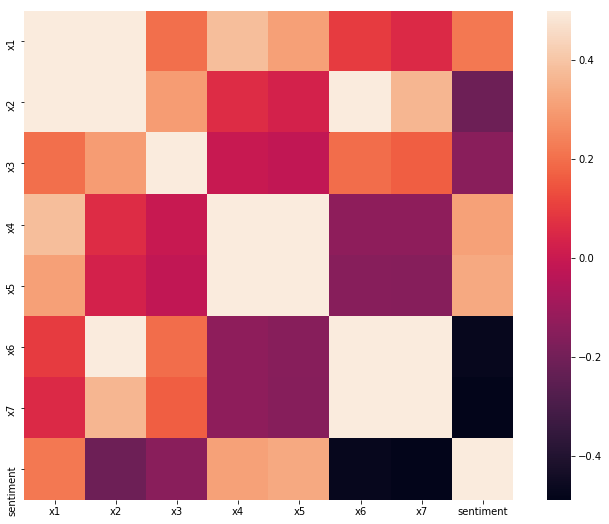

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(data.corr(), vmax=.5, square=True)

# Train Model

In [29]:
# Get the DataSet to train X & Y
Y = data['sentiment'].copy()
X = data.copy()
X.drop(['sentiment'], axis=1, inplace=True)

* Uses of Cross Validation to split data 0.7 - 0.3

In [55]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.45, random_state = 0)

* Using SKlearn to train

In [56]:
from sklearn import linear_model
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

* Get the table of probabilities

In [57]:
probs = lm.predict_proba(X_test)
probs

array([[0.10279155, 0.89720845],
       [0.88313789, 0.11686211],
       [0.40706757, 0.59293243],
       ...,
       [0.06714786, 0.93285214],
       [0.82602625, 0.17397375],
       [0.14539385, 0.85460615]])

* Predict the X_test

In [58]:
prediction = lm.predict(X_test)

* Get the accuracy of the model

In [59]:
lm.score(X_test, Y_test)

0.8014222222222223

* Show the confussion matrix

In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, prediction)

array([[8585, 2518],
       [1950, 9447]])

# Own implementation of Logistic Regression

This implementation of *Logistic Gradient* use the method of Newton & Raphson to get the maximum likehood coeficient

In [66]:
import numpy as np
from numpy.linalg import inv
class MyLogisticRegression():
    def __init__(self, coef = None):
        self.coef = coef
    
    def logistic_prob(self, X, B):
        rows = np.shape(X)[0] # Numero de filas
        cols = np.shape(X)[1] # Número de columnas
        pi = list(range(1, rows + 1))
        exponent = list(range(1, rows +1 ))
        # Obtener las probabilidades:
        for i in range(rows):
            exponent[i] = 0
            # Obtener los exponentes, esto es por columnas:
            for j in range(cols):
                ex = X[i][j]*B[j]
                exponent[i] = exponent[i] + ex
            # End for exps
            with np.errstate(divide='ignore', invalid='ignore'):
                pi[i] = 1/(1 + np.exp(-exponent[i]))
        return pi

    def getW(self, P):
        n = len(P)
        W = np.zeros(n*n).reshape(n,n)
        for i in range(n):
            W[i,i] = P[i]*(1-P[i])
            W[i,i].astype(float)
        return W

    def fit(self, data, labels, err_allowed=0.01):
        X = data.values
        Y = labels.values
        rows = np.shape(X)[0]
        # Definición de la entrada bias, siempre es 1
        bias = np.ones(rows).reshape(rows, 1)
        # Add to the end of the array, Bias.
        __X = np.append(X, bias, axis = 1)
        cols = np.shape(__X)[1]
        # Inicializando beta como una matriz columna de ceros
        B = np.zeros(cols).reshape(cols, 1)
        # Primero se obtienen las probabilidades:
        ## range(1, t) itera desde 1 hasta t-1
        dB = np.array(range(1, cols + 1)).reshape(cols, 1)
        # Definir un error inicial
        current_error = 1000
        while current_error > err_allowed:
            # Obtener la matriz Pi
            Pi = []
            # Se obtiene una lista con todas las probabilidades
            Pi = self.logistic_prob(__X, B)
            # Obtener la matriz W:
            W = self.getW(Pi)
            den = inv(np.matmul(np.matmul(np.transpose(__X),W), __X))
            inter = (Y- np.transpose(Pi)).transpose()
            num = np.matmul(np.transpose(__X),(inter))
            dB = np.matmul(den, num)
            # Get the new Beta value
            B = B + dB
            current_error = np.sum(dB*dB)
            print('Current Error>', current_error)
            self.coef = B
        print('B>', B)
    
    def dotproduct(self, a, b):
        return sum(list(map(lambda x, y: x*y, a,b)))

    def sigmoid(self, val):
        return 1/(1 + np.exp(-val))

    def predict(self, X_test, threshold=0.5):
        if(np.shape(self.coef)[0] == 0 and np.shape(self.coef)[1] == 0):
            print('Error: Entrenar el modelo')
        else:
            X = X_test.values
            W = self.coef[:-1]
            b = self.coef[-1]
            estimated = np.zeros(np.shape(X)[0]).reshape(np.shape(X)[0], 1)
            for i in range(0, np.shape(X)[0]):
                xi = X[i,:]
                reg = self.dotproduct(xi,W) + b
                prob = self.sigmoid(float(reg))
                if prob >= threshold:
                    estimated[i,0] = 1
                else:
                    estimated[i,0] = 0
            return estimated
    def score(self, X_test, Y_test,threshold=0.5):
        predicted = self.predicted(X_test, threshold)
        Y_ar = Y_test.values
        n = np.shape(X_ar)[0]
        poscount = 0
        for i in range(n):
            if predicted[i] == Y_ar[i]:
                poscount = poscount + 1
        return poscount/n

* Instantiate a object of Logistic Regression

In [62]:
mylogreg = MyLogisticRegression()

In [63]:
mypredicted = mylogreg.fit(X_train, Y_train)

MemoryError: 